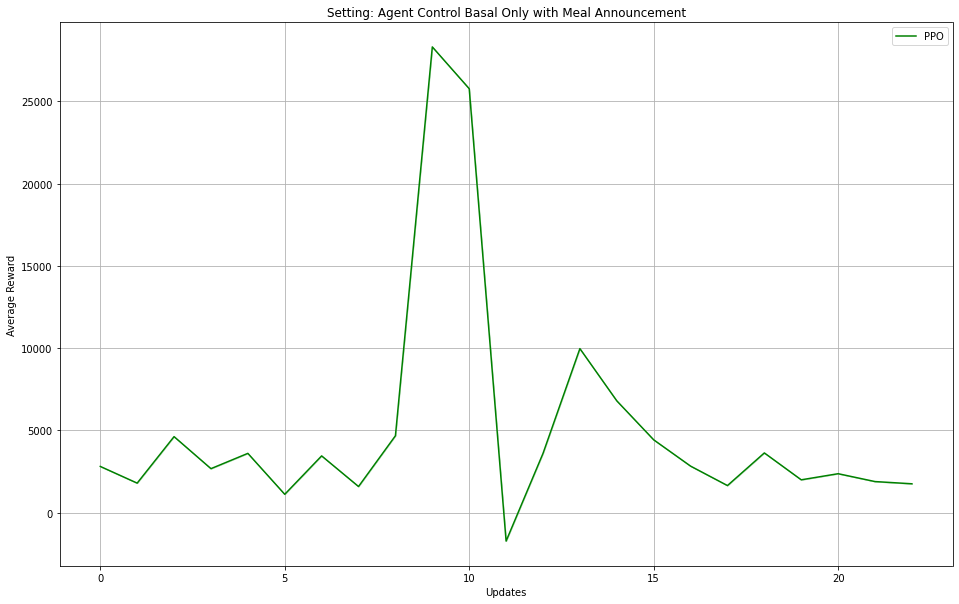

In [112]:
# Analysing the PPO algorithm for Blood Glucose Control. 
# Chirath Hettiarachchi - 29th March.

# info..
# There are 3 files written.
# reward_summary_0.csv - total rewards per episode
# action_summary_0.csv - to plot the histograms if needed.
# training_summary_0.csv - everything per episode, also have the test simulation results.

from debug_visualiser import get_debug_info
from matplotlib import pyplot as plt
import matplotlib.gridspec
import numpy as np
import pandas as pd
import json
%matplotlib inline


PATH = '../results/ppo_1/args.json'
path_ppo_rew = '../results/ppo_exp/reward_summary_'

#PATH = '../scratch/ch9972/results/ppo_meal_1/args.json'
#path_ppo_rew = '../scratch/ch9972/results/ppo_meal_1/reward_summary_'


with open(PATH) as json_file:
    data = json.load(json_file)
seeds = data['seeds']

def get_episodicRewards(path, seeds):
    cur_length = []
    avg_rewards = []
    refined = []
    FILES = [ path + str(seed)+'.csv' for seed in seeds]
    for file in FILES:
        reward_summary = pd.read_csv(file)
        cur_length.append(reward_summary.shape[0])
        avg_rewards.append(reward_summary)
    for x in avg_rewards:
        refined.append(x[0:min(cur_length)])
    data = pd.concat(refined, axis=1)
    data['mean'] = data.mean(axis=1)
    data['std_dev'] = data.std(axis=1)
    return data

fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111)

data = get_episodicRewards(path_ppo_rew, seeds)
ppo_mstd = data['std_dev']
ppo_ma = data['mean'] 
ax.plot(ppo_ma, '-g', label="PPO")
ax.fill_between(ppo_mstd.index, ppo_ma - 2 * ppo_mstd, ppo_ma + 2 * ppo_mstd, color="g", alpha=0.2)
ax.grid()
ax.set_title('Setting: Agent Control Basal Only with Meal Announcement')
ax.set_xlabel('Updates')
ax.set_ylabel('Average Reward')
ax.legend(loc="upper right")
plt.show()



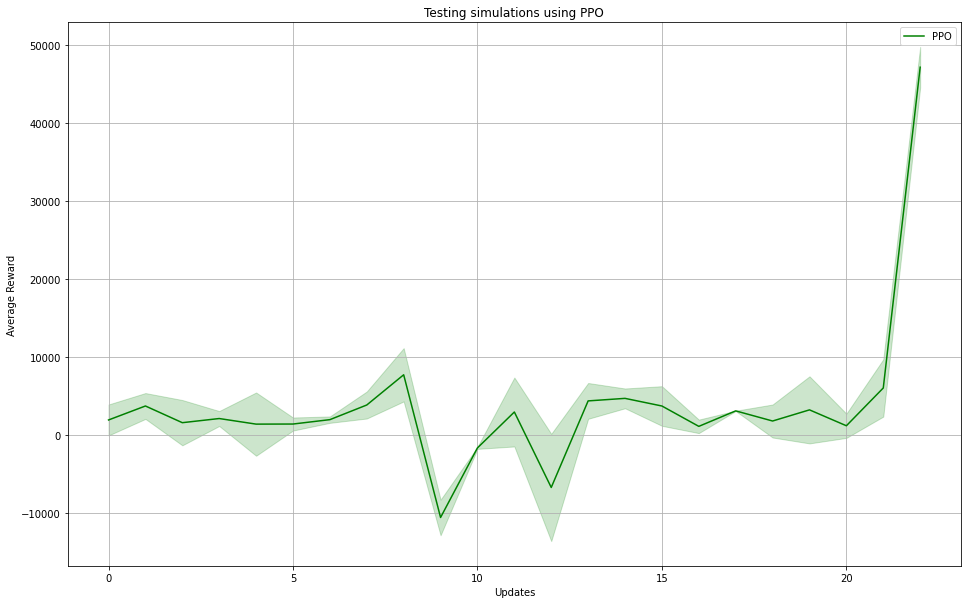

In [113]:
def get_trainingSummary(path, seed):
    FILE = path + str(seed)+'.csv'
    data = pd.read_csv(FILE)
    return data

path_ppo_summary = '../results/ppo_exp/training_summary_'
#path_ppo_summary = '../scratch/ch9972/results/ppo_meal_1/training_summary_'


data = get_trainingSummary(path_ppo_summary, 0)
#print(data)

fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111)
ppo_mstd = data['t_rew_std']
ppo_ma = data['t_rew_mean'] 
ax.plot(ppo_ma, '-g', label="PPO")
ax.fill_between(ppo_mstd.index, ppo_ma - 2 * ppo_mstd, ppo_ma + 2 * ppo_mstd, color="g", alpha=0.2)
ax.grid()
ax.set_title('Testing simulations using PPO')
ax.set_xlabel('Updates')
ax.set_ylabel('Average Reward')
ax.legend(loc="upper right")
plt.show()
